Total de Receitas por Ano:
      receitas.total_orcamentario
ano                              
2018                     15000000
2019                     16000000
2020                     15500000
2021                     17000000
2022                     17500000
2023                     18000000
Total de Despesas por Ano:
      despesas.despesas_obrigatorias  despesas.despesas_descritivas  \
ano                                                                   
2018                         7000000                        3000000   
2019                         7500000                        3200000   
2020                         7300000                        3100000   
2021                         8000000                        3400000   
2022                         8200000                        3500000   
2023                         8500000                        3700000   

      despesas.total_com_folha  despesas.total_com_gratuidade  despesas.opex  \
ano                      

<Figure size 1000x600 with 0 Axes>

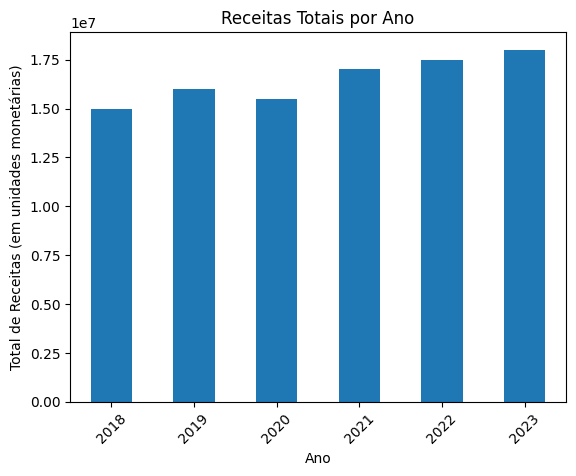

<Figure size 1200x800 with 0 Axes>

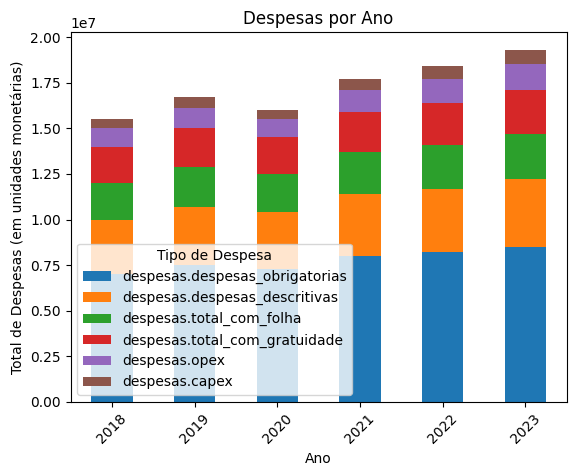

<Figure size 1000x600 with 0 Axes>

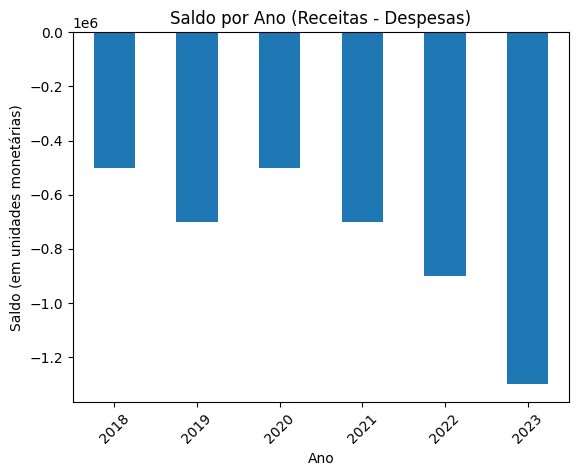

In [6]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Leitura do arquivo JSON
file_path = '/content/sample_data/api_transparencia_sistemas2018-utrlj.json'
with open(file_path, 'r', encoding='utf-8-sig') as f:
    data = json.load(f)

# Normalização dos dados
orcamento_df = pd.json_normalize(data['orcamento_sesc'])

# Receitas por ano
receitas_por_ano = orcamento_df[['ano', 'receitas.total_orcamentario']].set_index('ano')
print("Total de Receitas por Ano:")
print(receitas_por_ano)

# Despesas por ano
despesas_por_ano = orcamento_df[['ano', 'despesas.despesas_obrigatorias', 'despesas.despesas_descritivas', 'despesas.total_com_folha', 'despesas.total_com_gratuidade', 'despesas.opex', 'despesas.capex']].set_index('ano')
print("Total de Despesas por Ano:")
print(despesas_por_ano)

# Cálculo do saldo por ano
orcamento_df['saldo'] = orcamento_df['receitas.total_orcamentario'] - orcamento_df['despesas.despesas_obrigatorias'] - orcamento_df['despesas.despesas_descritivas'] - orcamento_df['despesas.total_com_folha'] - orcamento_df['despesas.total_com_gratuidade'] - orcamento_df['despesas.opex'] - orcamento_df['despesas.capex']
saldo_por_ano = orcamento_df[['ano', 'saldo']].set_index('ano')
print("Saldo por Ano (Receitas - Despesas):")
print(saldo_por_ano)

# Gráficos usando matplotlib

# Gráfico de Receitas por ano
plt.figure(figsize=(10, 6))
receitas_por_ano.plot(kind='bar', legend=False)
plt.title('Receitas Totais por Ano')
plt.xlabel('Ano')
plt.ylabel('Total de Receitas (em unidades monetárias)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de Despesas por ano
plt.figure(figsize=(12, 8))
despesas_por_ano.plot(kind='bar', stacked=True)
plt.title('Despesas por Ano')
plt.xlabel('Ano')
plt.ylabel('Total de Despesas (em unidades monetárias)')
plt.legend(title='Tipo de Despesa')
plt.xticks(rotation=45)
plt.show()

# Gráfico de Saldo por ano
plt.figure(figsize=(10, 6))
saldo_por_ano.plot(kind='bar', legend=False)
plt.title('Saldo por Ano (Receitas - Despesas)')
plt.xlabel('Ano')
plt.ylabel('Saldo (em unidades monetárias)')
plt.xticks(rotation=45)
plt.show()